<a href="https://colab.research.google.com/github/sebastianmunozvasq/CFD/blob/main/TP1_rellenar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 1

En este trabajo práctico, tendrán que graficar el perfil de velocidades de un flujo alrededor de una esfera. Para esto, deberá aplicar las técnicas aprendidas en el curso para poder ejecutar lo que se les pide.

#### Objetivo

Consideremos un fluido incompresible alrededor de una esfera sólida estática de radio R y de diámetro D. El fluido, con densidad $\rho$ y viscosidad $\mu$ se acerca a la esfera verticalmente de abajo hacia arriba con una velocidad uniforme $v_{\infty}$. Esta velocidad también se denomina **velocidad de aproximación**, en problemas de flujo externo.

Debe considerar que para este problema el fluido es lo suficientemente viscoso para que el  flujo se considere como flujo reptante o *creeping flow*, por sus siglas en inglés. Esto significa que el número de Reynolds es menor a 0.1. En este caso, los términos no estacionarios y convectivos se pueden despreciar según la ecuación de Navier-Stokes adimensional obtenida al escalar el gradiente de presión con las fuerzas viscosas:

$$ \text{Re} \frac{D \tilde{v}}{d \tilde{t}} = - \tilde{\nabla} \mathcal{\tilde{\tilde{P}}} + \tilde{\nabla}^2 \tilde{v} \hspace{0.5cm}$$

Si $\text{Re} \rightarrow 0$, se obtiene la Ecuación de Stokes,

$$ \tilde{\nabla} \mathcal{\tilde{\tilde{P}}}=  \tilde{\nabla}^2 \tilde{v} \hspace{0.5cm}$$

que tiene un amplio uso en sistemas donde las fuerzas viscosas son dominantes, tales como arterias, capilares y sistemas de microfluidos.

Este régimen de flujo está caracterizado por la ausencia de formación de remolinos aguas abajo de la esfera.


Para esto, deseamos graficar los siguientes perfiles de velocidad:

$$v_r(r,\theta) = v_{\infty}\cdot \left[1- \frac{3}{2} \left(\frac{R}{r}\right)+\frac{1}{2} \left(\frac{R}{r}\right)^3\right]\cdot cos(\theta)$$

$$v_{\theta}(r,\theta) = v_{\infty}\cdot \left[-1+\frac{3}{4} \left(\frac{R}{r}\right)+\frac{1}{4} \left(\frac{R}{r}\right)^3\right]\cdot sin(\theta)$$

Consideraremos que $r$ es la coordenada horizontal y $\theta$ es la coordenada vertical. Además, considere que la esfera tiene un radio de 5 metros y que la velocidad de acercamiento es de 5 m/s.

In [ ]:
# Importar los paquetes necesarios
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Definición de parámetros físicos del problema

# Velocidad de acercamiento, v_infinito
v_infinito=5 #m/s

# Radio de la esfera
R=5 #m

# Región lejana


# Número de puntos en la dirección radial y angular

# Definir los vectores generadores del dominio
# utilizando la función linspace
x=np.linspace(5,10,100)
y=np.linspace(0,2*np.pi,100)


# Con estos vectores, podemos generar un tablero utilizando la función meshgrid de NumPy
# Meshgrid genera matrices X e Y para generar "un tablero" en base a los vectores generadores
X, Y = np.meshgrid(x, y)

<ipython-input-4-ef8c519d6220>:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(X, Y, 'o', color='k', marker='.', linestyle='none')


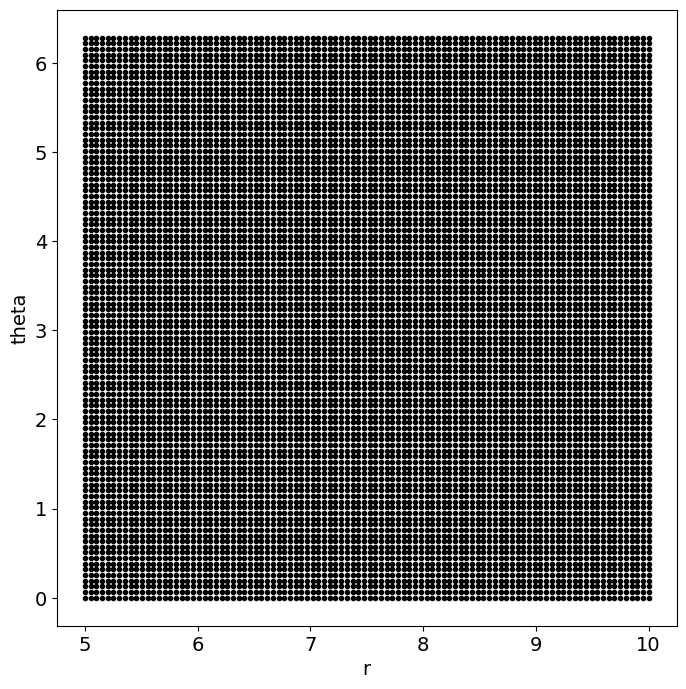

In [ ]:
# Creación de la figura
plt.figure(figsize=[8,8])

# Gráfico de puntos con input 2D / 2D
plt.plot(X, Y, 'o', color='k', marker='.', linestyle='none')

# Títulos de ejes
plt.xlabel( 'r', fontsize=14)
plt.ylabel( 'theta', fontsize=14)

# Aumentamos el tamaño de las etiquetas de los ejes
plt.tick_params(axis='both', which='major', labelsize=14)

# Visualización
plt.show()

Note que la coordenada radial comienza en 5 porque se desea analizar el flujo **externo** a la esfera.

Se les pide graficar: Un gráfico de líneas con las magnitudes de la velocidad radial y tangencial en función del radio para tres ángulos fijos. Un gráfico de líneas con las magnitudes de la velocidad radial y tangencial en función del ángulo para tres radios fijos

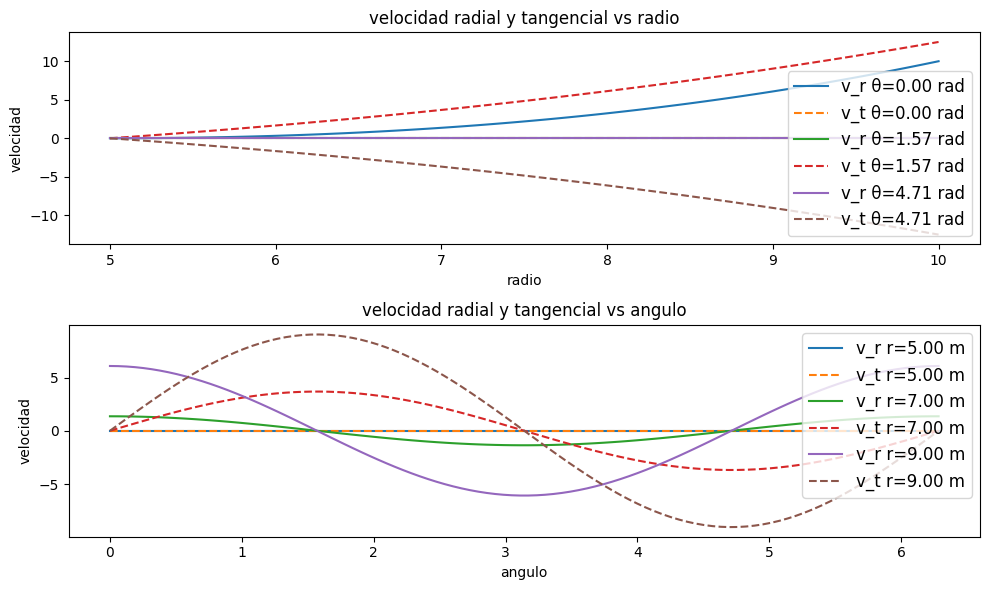

In [ ]:
def perfil_velocidad(radio, angulo):
    v_r = v_infinito * (1 - (3/2) * (radio/R) + (1/2) * (radio/R)**3) * np.cos(angulo)
    v_t = v_infinito * (-1 + (3/4) * (radio/R) + (1/4) * (radio/R)**3) * np.sin(angulo)
    return v_r, v_t

fig, ax = plt.subplots(2,1,figsize=[10,6])

# Gráficos para ángulos constantes
theta_list=[0, np.pi/2, 3*np.pi/2]

for theta in theta_list:
  ax[0].plot(x, perfil_velocidad(x, theta)[0], label=f'v_r θ={theta:.2f} rad')
  ax[0].plot(x, perfil_velocidad(x, theta)[1], label=f'v_t θ={theta:.2f} rad', linestyle='--')

ax[0].set_title('velocidad radial y tangencial vs radio')
ax[0].set_xlabel('radio')
ax[0].set_ylabel('velocidad')
ax[0].legend(fontsize=12)



# Gráficos para radios constantes
radio_list=[5, 7, 9]

for radio in radio_list:
  ax[1].plot(y, perfil_velocidad(radio, y)[0], label=f'v_r r={radio:.2f} m')
  ax[1].plot(y, perfil_velocidad(radio, y)[1], label=f'v_t r={radio:.2f} m', linestyle='--')

ax[1].set_title('velocidad radial y tangencial vs angulo')
ax[1].set_xlabel('angulo')
ax[1].set_ylabel('velocidad')
ax[1].legend(fontsize=12)


plt.tight_layout()
plt.show()






#### Paso 3: Definición del perfil de velocidad

Recordemos que la norma de un vector se puede calcular mediante:

$$ |\mathbf{v}| = \sqrt{v_r^2 + v_{\theta}^2} $$

In [ ]:
# Definición de la matriz de la componente radial de la velocidad
v_r=perfil_velocidad(X,Y)[0]


# Definición de la matriz de la componente angular de la velocidad
v_theta=perfil_velocidad(X,Y)[1]

# Cálculo de la magnitud del vector [v_r, v_theta]
V=np.sqrt(v_r**2+v_theta**2)

#### Visualización

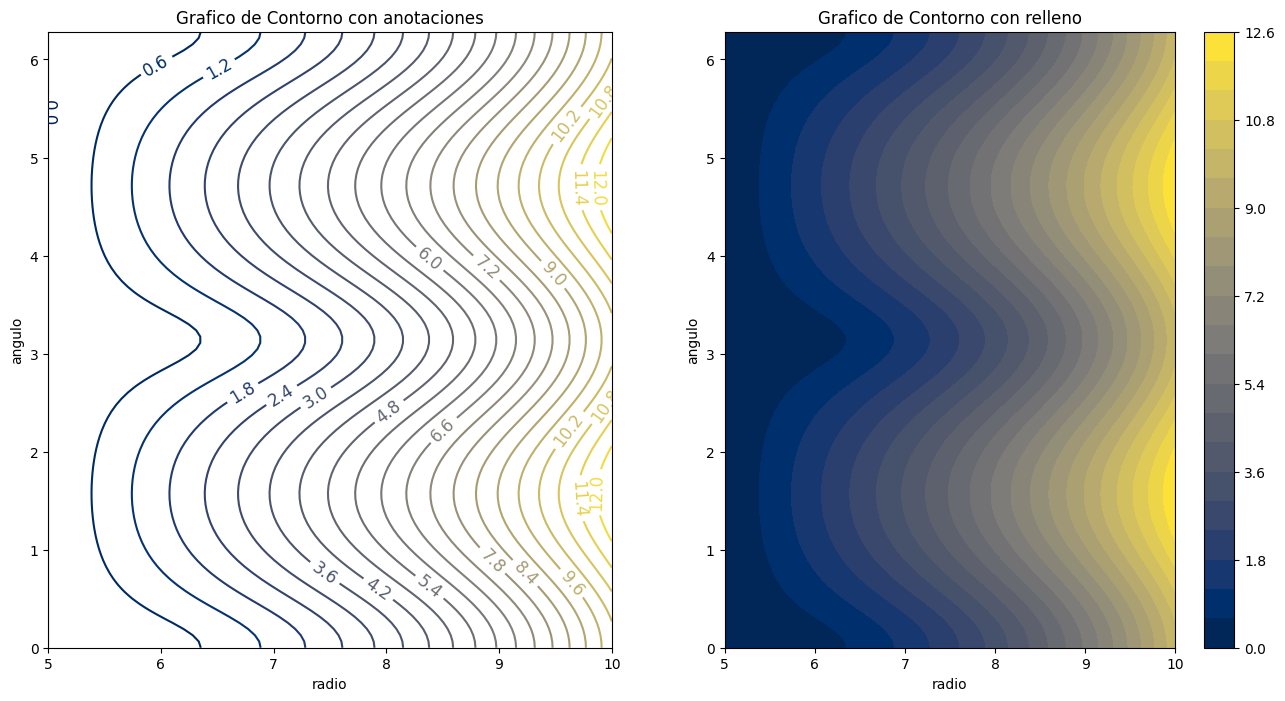

In [ ]:
#Seleccionamos un mapa de colores inclusivo para personas
# con visibilidad de colores limitada
cm='cividis'

# Generamos un objeto "axis" para graficar, y dos sub-gráficos
fig, ax = plt.subplots(1,2, figsize=[16,8])

# Gráfico de contorno sin relleno
cp=ax[0].contour(X, Y, V, 20, cmap=cm)

# Anotaciones
ax[0].clabel(cp, inline=True, fontsize=12)

# Gráfico de contorno con relleno
cpf=ax[1].contourf(X, Y, V, 20, cmap=cm)

# Anotaciones
#ax[1].clabel(cpf, inline=True, fontsize=12)

# Agregamos barrita de color
fig.colorbar(cpf)

# Títulos para los gráficos
ax[0].set_title('Grafico de Contorno con anotaciones')
ax[1].set_title('Grafico de Contorno con relleno')
ax[0].set_xlabel('radio')
ax[1].set_xlabel('radio')
ax[0].set_ylabel('angulo')
ax[1].set_ylabel('angulo')

# Guardamos el archivo
plt.savefig('contornos.pdf')

También, podemos graficar este mismo gráfico con un $polar$ $plot$:

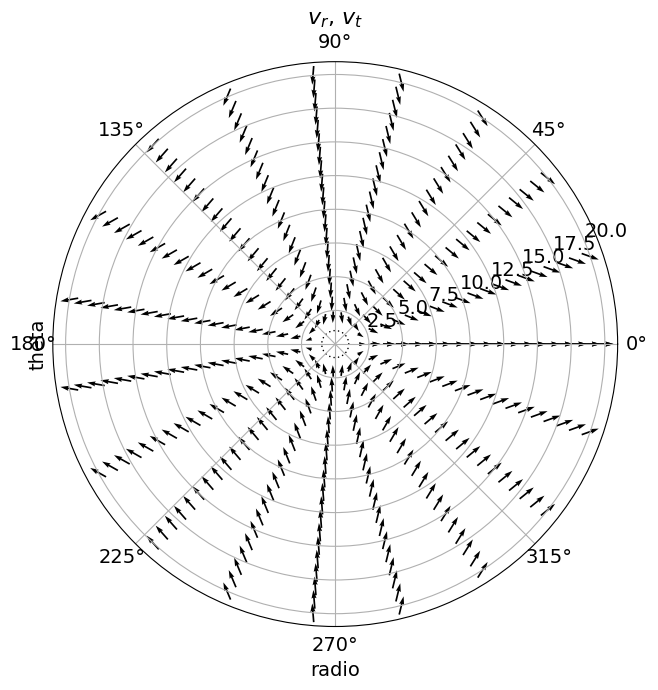

In [ ]:
def velocity_components(R, theta, R0, v_i):
    v_r = v_i * (1 - (3/2) * (R0/R) + (1/2) * (R0/R)**3) * np.cos(theta)
    v_t = v_i * (-1 + (3/4) * (R0/R) + (1/4) * (R0/R)**3) * np.sin(theta)

    return v_r, v_t
R_0=1
R_inf=20
v_i=5
# Crear una malla de coordenadas polares
R_vals = np.linspace(R_0, R_inf, 200)  # Valores de R en el rango [1, 20]
t_vals = np.linspace(0, 2 * np.pi, 200)  # Valores de t en el rango [0, 2π]
R, T = np.meshgrid(R_vals, t_vals)

# Calcular las componentes de la velocidad en cada punto de la malla
v_r, v_t = velocity_components(R, T, R_0, v_i)

# Calcular la magnitud de la velocidad en cada punto
V = np.sqrt(v_r**2 + v_t**2)


#Se define un nuevo rango de valores para R_vals y t_vals para una mejor visualización

R_vals = np.linspace(R_0, R_inf, 20)  # Valores de R en el rango [1, 20]
t_vals = np.linspace(0, 2 * np.pi, 20)  # Valores de t en el rango [0, 2π]
R, T = np.meshgrid(R_vals, t_vals)
v_r, v_t = velocity_components(R, T, R_0, v_i)


# El comando subplot_kw={'projection': 'polar'} permite crear un quiver plot con coordenadas polares. Aquí sólo se les pide colocar el título de los ejes y del gráfico.
# Finalmente, coloque el colorbar para su gráfico en coordenadas polares.
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(7, 7))
quiver = ax.quiver(T, R, v_r, v_t, cmap='cividis', pivot='middle', clim=[0, V.max()])
ax.set_title(r'$v_r$' + r', $v_t$', size=16)
ax.tick_params(labelsize = 14)
ax.set_xlabel("radio", size = 14)
ax.set_ylabel("theta", size = 14)


plt.tight_layout()
plt.show()